# import Libraries

In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

# read dataset

In [2]:
dataset=pd.read_csv('C:/Users/Satyam/Desktop/AI/Iris.csv')

In [3]:
x=dataset.iloc[:,1:5].values
y=dataset.iloc[:,5].values

In [4]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing

In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# one hot coding like 0 1 0,0 0 1

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder=LabelEncoder()
y1=encoder.fit_transform(y)

In [8]:
y=pd.get_dummies(y1).values

# dividing the train and test data

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (120, 4)
shape of output - training set (120, 3)
shape of input - testing set (30, 4)
shape of output - testing set (30, 3)


# import cnn layers

In [11]:
from keras.models import Sequential 
from keras.layers import Activation, Dense

In [12]:
model=Sequential()

# use relu activation func in hidden layer ,easy and fast to compute

In [13]:
model.add(Dense(3,input_dim=4 ,activation = 'relu')) 
model.add(Dense(3, activation = 'softmax')) 

# use adam optimizer for compile

In [14]:
model.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


# initial weight

In [16]:
print(model.get_weights())

[array([[ 0.5136697 ,  0.25657225,  0.09303904],
       [-0.03355736,  0.14745498,  0.82696676],
       [ 0.6467314 , -0.8352992 , -0.7773202 ],
       [-0.56319004, -0.6836673 ,  0.75851727]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[ 0.3922007 ,  0.863466  ,  0.56424475],
       [-0.42014623, -0.32610703, -0.40325832],
       [-0.35199142,  0.18820548,  0.8911984 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]


# training a model on train data and updates the weight

In [17]:
history = model.fit(x_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.3083
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.3083
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.3083
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3018 - accuracy: 0.3083
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.2917
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.2917
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.2917
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.3000
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.3083
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.3083
Epoch 11/

# graph between loss and accuracy

No handles with labels found to put in legend.


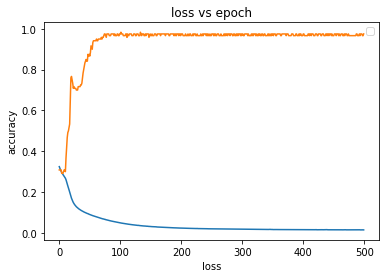

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.title('loss vs epoch')
plt.legend()
plt.show()

# updated weight

In [19]:
print(model.get_weights())

[array([[ 0.3677826 ,  0.81141984,  0.07759679],
       [-0.82297003,  0.9586565 ,  0.6687058 ],
       [ 1.4764487 , -1.1142836 , -0.29913944],
       [ 0.48858523, -1.3428466 ,  1.4406444 ]], dtype=float32), array([-0.59335613,  1.0474986 , -0.39707556], dtype=float32), array([[-0.5881409 ,  0.716163  ,  0.9331923 ],
       [ 1.1912537 ,  0.48564097, -2.589365  ],
       [ 0.23880517, -0.10973804,  0.77778757]], dtype=float32), array([ 0.47446537,  0.14429557, -0.29590482], dtype=float32)]


# evaluate accuracy and loss

In [20]:
result = model.evaluate(x_test, y_test)
print("test accuracy:", result[1]*100)

1/1 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 1.0000
test accuracy: 100.0


In [21]:
y_pred=model.predict(x_test)

In [22]:
error=y_pred-y_test

In [23]:
print(error)

[[-1.18613243e-03  1.18618296e-03  1.80993838e-13]
 [ 8.55848268e-02 -8.80036354e-02  2.41887616e-03]
 [ 4.16273484e-03 -1.90151930e-02  1.48524875e-02]
 [-2.49379873e-03  2.49387952e-03  5.34732805e-12]
 [ 1.21467465e-05  2.68165052e-01 -2.68177211e-01]
 [ 2.28182040e-03 -1.11210644e-01  1.08928837e-01]
 [ 2.68347449e-05  9.51870382e-02 -9.52138305e-02]
 [-1.68334842e-02  1.68334823e-02  7.59131924e-10]
 [-2.00139284e-02  2.00139359e-02  1.23201949e-09]
 [ 1.04720800e-06  1.65061615e-02 -1.65072680e-02]
 [ 3.69037036e-03 -9.18930769e-02  8.82026702e-02]
 [-7.65347481e-03  7.65342778e-03  6.60530242e-11]
 [ 7.32462240e-07  2.37026121e-02 -2.37033963e-02]
 [ 4.01017349e-03 -3.84885073e-02  3.44783925e-02]
 [ 1.83023885e-03 -1.65401518e-01  1.63571209e-01]
 [-9.01311636e-03  9.01313871e-03  3.94722727e-10]
 [ 6.49210019e-03 -2.83297300e-02  2.18377523e-02]
 [ 1.83168892e-03 -2.81325340e-01  2.79493600e-01]
 [-1.16964579e-02  1.16963759e-02  1.78538392e-10]
 [-6.34586811e-03  6.34590583e-

In [24]:
print(y_pred)

[[9.98813868e-01 1.18618296e-03 1.80993838e-13]
 [8.55848268e-02 9.11996365e-01 2.41887616e-03]
 [4.16273484e-03 9.80984807e-01 1.48524875e-02]
 [9.97506201e-01 2.49387952e-03 5.34732805e-12]
 [1.21467465e-05 2.68165052e-01 7.31822789e-01]
 [2.28182040e-03 8.88789356e-01 1.08928837e-01]
 [2.68347449e-05 9.51870382e-02 9.04786170e-01]
 [9.83166516e-01 1.68334823e-02 7.59131924e-10]
 [9.79986072e-01 2.00139359e-02 1.23201949e-09]
 [1.04720800e-06 1.65061615e-02 9.83492732e-01]
 [3.69037036e-03 9.08106923e-01 8.82026702e-02]
 [9.92346525e-01 7.65342778e-03 6.60530242e-11]
 [7.32462240e-07 2.37026121e-02 9.76296604e-01]
 [4.01017349e-03 9.61511493e-01 3.44783925e-02]
 [1.83023885e-03 8.34598482e-01 1.63571209e-01]
 [9.90986884e-01 9.01313871e-03 3.94722727e-10]
 [6.49210019e-03 9.71670270e-01 2.18377523e-02]
 [1.83168892e-03 7.18674660e-01 2.79493600e-01]
 [9.88303542e-01 1.16963759e-02 1.78538392e-10]
 [9.93654132e-01 6.34590583e-03 4.80053913e-11]
 [1.76320563e-03 8.43900263e-01 1.543364

In [25]:
x_test[1,:],y_pred[1]

(array([5.1, 2.5, 3. , 1.1]),
 array([0.08558483, 0.91199636, 0.00241888], dtype=float32))

In [26]:
y_pred_class=np.argmax(y_pred[1])

In [27]:
print(y_pred_class)

1


# Interpretation

In [28]:
y_pred=model.predict(x_test)

y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
